In [12]:
import os
dataPath = os.path.join(os.getcwd(), 'data', 'snack')
dataPath 

'C:\\Users\\SBA\\pytorch\\pytorchEx\\data\\snack'

In [66]:
import random
snackType = os.listdir(dataPath)
print(snackType)
snackFiles = os.listdir(os.path.join(dataPath, snackType[0]))
print(snackFiles)
num = random.randint(0,len(snackType[0]))
print(snackFiles[0])

['banana', 'blueberry', 'choco', 'cone', 'gum', 'octopus', 'shrimp']
['10095_0_m_1.jpg', '10095_0_m_11.jpg', '10095_0_m_14.jpg', '10095_0_m_15.jpg', '10095_0_m_17.jpg', '10095_0_m_19.jpg', '10095_0_m_2.jpg', '10095_0_m_20.jpg', '10095_0_m_23.jpg', '10095_0_m_24.jpg', '10095_0_m_3.jpg', '10095_0_m_4.jpg', '10095_0_m_5.jpg', '10095_0_m_6.jpg', '10095_0_m_7.jpg', '10095_0_m_8.jpg', '10095_0_m_9.jpg', '10095_0_s_11.jpg', '10095_0_s_12.jpg', '10095_0_s_13.jpg', '10095_0_s_14.jpg', '10095_0_s_15.jpg', '10095_0_s_16.jpg', '10095_0_s_17.jpg', '10095_0_s_19.jpg', '10095_0_s_2.jpg', '10095_0_s_20.jpg', '10095_0_s_21.jpg', '10095_0_s_23.jpg', '10095_0_s_3.jpg', '10095_0_s_5.jpg', '10095_0_s_6.jpg', '10095_0_s_7.jpg', '10095_0_s_8.jpg', '10095_0_s_9.jpg', '10095_30_m_1.jpg', '10095_30_m_11.jpg', '10095_30_m_12.jpg', '10095_30_m_13.jpg', '10095_30_m_14.jpg', '10095_30_m_16.jpg', '10095_30_m_17.jpg', '10095_30_m_18.jpg', '10095_30_m_19.jpg', '10095_30_m_2.jpg', '10095_30_m_20.jpg', '10095_30_m_22.jp

In [38]:
trainRatio = 0.6
validRatio = 0.2
testRatio = 1 - trainRatio - validRatio

In [67]:
import shutil

for snack in snackType:
    snackPath = os.path.join(dataPath, snack)
    files = os.listdir(snackPath)
    
    trainCount = int(trainRatio * len(files))
    validCount = int(validRatio * len(files))
    testCount = len(files) - trainCount - validCount
    print(f'trainCount:{trainCount} validCount:{validCount} testCount:{testCount}')

    print(f'files {len(files)}')
    shuffleFiles = random.sample(files, len(files))
    print(f'shuffleFiles {len(shuffleFiles)}')

    # shutil.rmtree(os.path.join(snackPath,'train'))
    # shutil.rmtree(os.path.join(snackPath,'valid'))
    # shutil.rmtree(os.path.join(snackPath,'test'))
    
    # os.makedirs(os.path.join(snackPath,'train'), exist_ok=True)
    # os.makedirs(os.path.join(snackPath,'valid'), exist_ok=True)
    # os.makedirs(os.path.join(snackPath,'test'), exist_ok=True)
    
    train_data = shuffleFiles[:trainCount-1]
    valid_data = shuffleFiles[trainCount: trainCount + validCount-1]
    test_data = shuffleFiles[trainCount + validCount:]
    print(f'Data: train {len(train_data)}, valid {len(valid_data)}, test{len(test_data)}')

trainCount:68 validCount:22 testCount:24
files 114
shuffleFiles 114
Data: train 67, valid 21, test24
trainCount:68 validCount:22 testCount:24
files 114
shuffleFiles 114
Data: train 67, valid 21, test24
trainCount:68 validCount:22 testCount:24
files 114
shuffleFiles 114
Data: train 67, valid 21, test24
trainCount:68 validCount:22 testCount:24
files 114
shuffleFiles 114
Data: train 67, valid 21, test24
trainCount:68 validCount:22 testCount:24
files 114
shuffleFiles 114
Data: train 67, valid 21, test24
trainCount:68 validCount:22 testCount:24
files 114
shuffleFiles 114
Data: train 67, valid 21, test24
trainCount:68 validCount:22 testCount:24
files 114
shuffleFiles 114
Data: train 67, valid 21, test24


In [68]:
trainFiles = train_data
validFiles = valid_data
testFiles = test_data
print(len(trainFiles))
print(len(validFiles))
print(len(testFiles))

67
21
24


In [63]:
# small데이터셋을 위한 폴더를 지정하고 4000장을 나눠서 보관

sdata = 'sdata\snack'
train_sdata = os.path.join(sdata,'train')
valid_sdata = os.path.join(sdata,'valid')
test_sdata = os.path.join(sdata,'test')

os.makedirs(train_sdata, exist_ok=True)
os.makedirs(valid_sdata, exist_ok=True)
os.makedirs(test_sdata, exist_ok=True)

train_sdata_banana = os.path.join(train_sdata,'banana')
train_sdata_blueberry = os.path.join(train_sdata,'blueberry')
os.makedirs(train_sdata_banana, exist_ok=True)
os.makedirs(train_sdata_blueberry, exist_ok=True)

valid_sdata_banana = os.path.join(valid_sdata,'banana')
valid_sdata_blueberry = os.path.join(valid_sdata,'blueberry')
os.makedirs(valid_sdata_banana, exist_ok=True)
os.makedirs(valid_sdata_blueberry, exist_ok=True)

test_sdata_banana = os.path.join(test_sdata,'banana')
test_sdata_blueberry = os.path.join(test_sdata,'blueberry')
os.makedirs(test_sdata_banana, exist_ok=True)
os.makedirs(test_sdata_blueberry, exist_ok=True)

In [69]:
# 한 클래스의 이미지 갯수 * 2
train_num = len(train_data)
valid_num = len(valid_data)
test_num  = len(test_data)

train_range = [0, train_num-1]
valid_range = [train_num, train_num + valid_num -1]
test_range  = [train_num + valid_num, train_num + valid_num + test_num-1]

print(train_range)
print(valid_range)
print(test_range)

[0, 66]
[67, 87]
[88, 111]


In [71]:
import os
import shutil

# 데이터셋 디렉토리 경로 설정 (데이터셋이 저장된 경로로 수정하세요)
dataset_dir = 'data\snack'

# 새로운 train, valid, test 디렉토리 생성 경로
base_dir = 'sdata\snack'

# 클래스 목록
classes = ['banana', 'blueberry']

# 폴더 경로 생성
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# 폴더 생성 함수
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# train, valid, test 폴더 및 각각의 클래스 폴더 생성
for cls in classes:
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(valid_dir, cls))

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir, label):
    srcFiles = os.listdir(src_dir)
    for i in range(start_idx, end_idx + 1):
        file_name = f'{label}.{i}.jpg'
        # print(f' fileName {file_name}')
        src_path = os.path.join(src_dir, srcFiles[i])
        print(f'src {src_path}')
        dst_path = os.path.join(dst_dir, file_name)
        print(f'dst {dst_path}')
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
for cls in classes:
    # train dataset 구성 (0~999)
    copy_images(train_range[0], train_range[1], os.path.join(dataset_dir, cls), os.path.join(train_dir, cls), cls)
    # print(train_range[0], train_range[1], dataset_dir, os.path.join(train_dir, cls))

    # valid dataset 구성 (1000~1249)
    copy_images(valid_range[0], valid_range[1], os.path.join(dataset_dir, cls), os.path.join(valid_dir, cls), cls)

    # test dataset 구성 (1250~1499)
    copy_images(test_range[0], test_range[1], os.path.join(dataset_dir, cls), os.path.join(test_dir, cls), cls)

print("데이터셋 분할 및 복사가 완료되었습니다.")

src data\snack\banana\10095_0_m_1.jpg
dst sdata\snack\train\banana\banana.0.jpg
src data\snack\banana\10095_0_m_11.jpg
dst sdata\snack\train\banana\banana.1.jpg
src data\snack\banana\10095_0_m_14.jpg
dst sdata\snack\train\banana\banana.2.jpg
src data\snack\banana\10095_0_m_15.jpg
dst sdata\snack\train\banana\banana.3.jpg
src data\snack\banana\10095_0_m_17.jpg
dst sdata\snack\train\banana\banana.4.jpg
src data\snack\banana\10095_0_m_19.jpg
dst sdata\snack\train\banana\banana.5.jpg
src data\snack\banana\10095_0_m_2.jpg
dst sdata\snack\train\banana\banana.6.jpg
src data\snack\banana\10095_0_m_20.jpg
dst sdata\snack\train\banana\banana.7.jpg
src data\snack\banana\10095_0_m_23.jpg
dst sdata\snack\train\banana\banana.8.jpg
src data\snack\banana\10095_0_m_24.jpg
dst sdata\snack\train\banana\banana.9.jpg
src data\snack\banana\10095_0_m_3.jpg
dst sdata\snack\train\banana\banana.10.jpg
src data\snack\banana\10095_0_m_4.jpg
dst sdata\snack\train\banana\banana.11.jpg
src data\snack\banana\10095_0_

In [72]:
dirList = [train_sdata_banana, train_sdata_blueberry, valid_sdata_banana, valid_sdata_blueberry, test_sdata_banana,test_sdata_blueberry]

for dir in dirList:
    print(len(os.listdir(dir)))

67
67
21
21
24
24


In [73]:
# 위에서 복사된 파일들 갯수 확인하기
train_banana = os.listdir(os.path.join(train_dir,'banana'))
train_blueberry = os.listdir(os.path.join(train_dir,'blueberry'))
valid_banana = os.listdir(os.path.join(valid_dir,'banana'))
valid_blueberry = os.listdir(os.path.join(valid_dir,'blueberry'))
test_banana = os.listdir(os.path.join(test_dir,'banana'))
test_blueberry = os.listdir(os.path.join(test_dir,'blueberry'))

#위의 6개 폴더 파일 갯수 확인하기
print(len(train_banana),len(train_blueberry),len(valid_banana),len(valid_blueberry),len(test_banana),len(test_blueberry))

67 67 21 21 24 24


In [77]:
import cv2
img = cv2.imread(os.path.join(os.path.join(train_dir,'banana',train_banana[3])))
cv2.imshow('img', img)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [78]:
from torchvision import transforms

org_size =(256,256)
org_size =(224,224)
img_size = 224

visual_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    ])

train_transform = transforms.Compose([
    #이미지 사이즈가 파일마다 제 각각
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [79]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import os

# Custom ImageFolder to return file name along with image and label
class ImageFolderWithFilenames(ImageFolder):
    def __getitem__(self, index):
        # Get the original tuple (image, label)
        original_tuple = super(ImageFolderWithFilenames, self).__getitem__(index)

        # Get the image file path
        path, _ = self.samples[index]
        # Return the image, label, and the file name (path)
        return original_tuple + (path,)

In [90]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

data_dir = os.getcwd() + '/sdata/snack'

batch_size = 32

visual_data = ImageFolder(root=f"{data_dir}/train", transform=visual_transform)
train_data = ImageFolder(root=f"{data_dir}/train", transform=train_transform)
valid_data = ImageFolder(root=f"{data_dir}/valid", transform=test_transform)
test_data = ImageFolderWithFilenames(root=f"{data_dir}/test", transform=test_transform)

visual_loader = DataLoader(visual_data, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

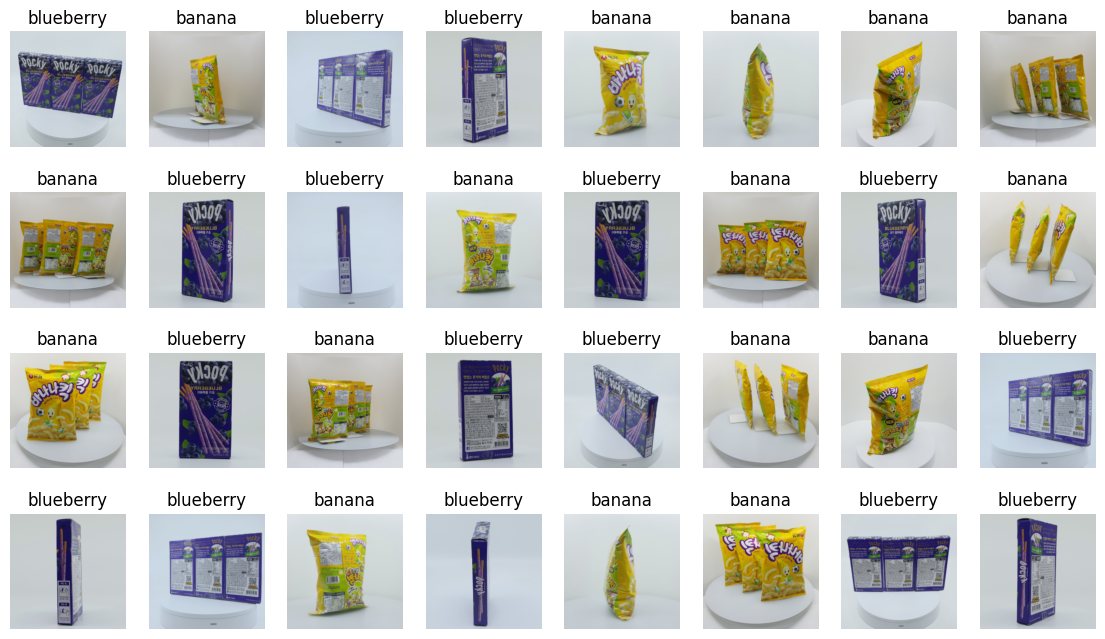

In [85]:
import matplotlib.pyplot as plt

# train데이터가 2000장이 있는데, 32장씩 데이터를 가져온다.
images, labels = next(iter(visual_loader))

classes ={0:'banana',1:'blueberry'}

fig = plt.figure(figsize=(14, 8))
for i in range(batch_size):
    # 4행 8열
    ax = fig.add_subplot(4, 8, i + 1)
    ax.set_title(classes[labels[i].item()])
    ax.axis('off')
    # 컬러 채널 순서를 재정렬
    ax.imshow(images[i].permute(1, 2, 0))

plt.show()

In [86]:
import torch
from torchvision.models import resnet50, mobilenet_v3_large

isResnet50 = True

device='cuda' if torch.cuda.is_available() else 'cpu'

# ImageNet에 사전학습된 모델을 가져와서 학습(Train)
# 분류기는 제외하고 특징 추출기만 사용

if isResnet50:
    model = resnet50(pretrained=True).to(device)
else:
    model = mobilenet_v3_large(pretrained=True).to(device)

model

C:\Users\sba\miniconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sba\miniconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\SBA/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [87]:
model = resnet50(pretrained=True).to(device)

# 특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
# fc -> 분류기 in_features -> 분류기의 입력
num_features = model.fc.in_features

# num_classes: 분류해야 할 클래스 수 (예: 3개의 클래스)
num_classes = 2

# 분류기 부분을 Softmax 활성화 함수로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),  # 입력에서 256개의 노드로 연결
    torch.nn.ReLU(),                     # 활성화 함수 ReLU
    torch.nn.Linear(256, num_classes)    # 최종 분류 클래스의 수에 맞게 출력 노드 수 설정
).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [88]:
import time
from tqdm import tqdm

# 학습 진행
def fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False):

    if resume==False:
        # 그래프로 출력하기 위한 리스트
        train_losses = []
        train_accuracies = []
        valid_losses = []
        valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()

        # 훈련 모드
        model.train()

        train_loss = 0
        train_acc = 0
        train_correct = 0

        for train_x, train_y in tqdm(train_loader):
            train_x, train_y = train_x.to(device), train_y.to(device)
            optimizer.zero_grad()
            outputs = model(train_x)

            # softmax + loss
            loss = criterion(outputs, train_y)

            loss.backward()
            optimizer.step()

            # batch마다 train_loss를 누적
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == train_y).sum().item()

        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                outputs = model(valid_x)
                loss = criterion(outputs, valid_y)
                valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                valid_correct += (predicted == valid_y).sum().item()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        scheduler.step(valid_loss)
        # 현재 learning_rate 값을 읽어올 수 있다.
        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1}: {now_lr:.8f}')

        # EarlyStopping을 호출하여 학습 중단 여부 확인
        early_stopping(valid_loss, model)

        # 학습 중단 조건을 충족하면 break
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
        print('-' * 100)

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

In [92]:
# EarlyStopping 클래스
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): 성능 개선이 없을 때 몇 번의 에포크까지 기다릴지.
            verbose (bool): True일 경우 개선될 때마다 메시지 출력.
            delta (float): 성능 개선으로 간주될 최소 변화량.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss
        # 처음에 호출됐을때는 best_score가 None이라서 초기값을 설정
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        # 지금까지의 best_score와 현재 score를 비교
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            # patience값이 모두 충족했을때, 종료조건이 만족될때
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''검증 손실이 감소하면 모델을 저장합니다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)  # 모델 상태 저장
        self.val_loss_min = val_loss

# EarlyStopping 인스턴스 생성 (patience=10)
early_stopping = EarlyStopping(patience=10, verbose=True, path='resnet50_best.pth')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.48s/it]


15.628sec : [Epoch 1/25] -> train loss: 0.5320, train acc: 96.269% / valid loss: 0.5266, valid acc: 100.000%
learning_rate 1: 0.00001000
Validation loss decreased (inf --> 1.053189).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.43s/it]


15.582sec : [Epoch 2/25] -> train loss: 0.4488, train acc: 100.000% / valid loss: 0.4521, valid acc: 100.000%
learning_rate 2: 0.00001000
Validation loss decreased (1.053189 --> 0.904105).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.36s/it]


15.116sec : [Epoch 3/25] -> train loss: 0.3515, train acc: 100.000% / valid loss: 0.3752, valid acc: 100.000%
learning_rate 3: 0.00001000
Validation loss decreased (0.904105 --> 0.750462).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.41s/it]


15.479sec : [Epoch 4/25] -> train loss: 0.2901, train acc: 100.000% / valid loss: 0.3128, valid acc: 100.000%
learning_rate 4: 0.00001000
Validation loss decreased (0.750462 --> 0.625649).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.47s/it]


15.735sec : [Epoch 5/25] -> train loss: 0.2329, train acc: 100.000% / valid loss: 0.2664, valid acc: 100.000%
learning_rate 5: 0.00001000
Validation loss decreased (0.625649 --> 0.532725).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.36s/it]


15.010sec : [Epoch 6/25] -> train loss: 0.1859, train acc: 100.000% / valid loss: 0.2391, valid acc: 100.000%
learning_rate 6: 0.00001000
Validation loss decreased (0.532725 --> 0.478217).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.36s/it]


15.011sec : [Epoch 7/25] -> train loss: 0.1515, train acc: 100.000% / valid loss: 0.2140, valid acc: 100.000%
learning_rate 7: 0.00001000
Validation loss decreased (0.478217 --> 0.427988).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.40s/it]


15.344sec : [Epoch 8/25] -> train loss: 0.1223, train acc: 100.000% / valid loss: 0.1857, valid acc: 100.000%
learning_rate 8: 0.00001000
Validation loss decreased (0.427988 --> 0.371463).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.45s/it]


15.584sec : [Epoch 9/25] -> train loss: 0.1029, train acc: 100.000% / valid loss: 0.1708, valid acc: 100.000%
learning_rate 9: 0.00001000
Validation loss decreased (0.371463 --> 0.341683).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.37s/it]


15.092sec : [Epoch 10/25] -> train loss: 0.0767, train acc: 100.000% / valid loss: 0.1689, valid acc: 100.000%
learning_rate 10: 0.00001000
Validation loss decreased (0.341683 --> 0.337786).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.36s/it]


15.286sec : [Epoch 11/25] -> train loss: 0.0647, train acc: 100.000% / valid loss: 0.1468, valid acc: 100.000%
learning_rate 11: 0.00001000
Validation loss decreased (0.337786 --> 0.293686).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.37s/it]


15.123sec : [Epoch 12/25] -> train loss: 0.0555, train acc: 100.000% / valid loss: 0.1336, valid acc: 100.000%
learning_rate 12: 0.00001000
Validation loss decreased (0.293686 --> 0.267111).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.34s/it]


14.943sec : [Epoch 13/25] -> train loss: 0.0487, train acc: 100.000% / valid loss: 0.1259, valid acc: 100.000%
learning_rate 13: 0.00001000
Validation loss decreased (0.267111 --> 0.251880).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.38s/it]


15.209sec : [Epoch 14/25] -> train loss: 0.0453, train acc: 100.000% / valid loss: 0.1307, valid acc: 100.000%
learning_rate 14: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.39s/it]


15.194sec : [Epoch 15/25] -> train loss: 0.0737, train acc: 100.000% / valid loss: 0.1275, valid acc: 100.000%
learning_rate 15: 0.00001000
EarlyStopping counter: 2 out of 10
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.37s/it]


15.056sec : [Epoch 16/25] -> train loss: 0.0682, train acc: 100.000% / valid loss: 0.1070, valid acc: 100.000%
learning_rate 16: 0.00001000
Validation loss decreased (0.251880 --> 0.213961).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.36s/it]


15.011sec : [Epoch 17/25] -> train loss: 0.0292, train acc: 100.000% / valid loss: 0.0837, valid acc: 100.000%
learning_rate 17: 0.00001000
Validation loss decreased (0.213961 --> 0.167444).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.36s/it]


15.085sec : [Epoch 18/25] -> train loss: 0.0494, train acc: 100.000% / valid loss: 0.0825, valid acc: 100.000%
learning_rate 18: 0.00001000
Validation loss decreased (0.167444 --> 0.165077).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.43s/it]


15.524sec : [Epoch 19/25] -> train loss: 0.0239, train acc: 100.000% / valid loss: 0.0895, valid acc: 100.000%
learning_rate 19: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.46s/it]


15.700sec : [Epoch 20/25] -> train loss: 0.0286, train acc: 100.000% / valid loss: 0.0906, valid acc: 100.000%
learning_rate 20: 0.00001000
EarlyStopping counter: 2 out of 10
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.37s/it]


15.072sec : [Epoch 21/25] -> train loss: 0.0301, train acc: 100.000% / valid loss: 0.0812, valid acc: 100.000%
learning_rate 21: 0.00001000
Validation loss decreased (0.165077 --> 0.162478).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.38s/it]


15.149sec : [Epoch 22/25] -> train loss: 0.0186, train acc: 100.000% / valid loss: 0.0911, valid acc: 100.000%
learning_rate 22: 0.00001000
EarlyStopping counter: 1 out of 10
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.34s/it]


14.911sec : [Epoch 23/25] -> train loss: 0.0151, train acc: 100.000% / valid loss: 0.0816, valid acc: 100.000%
learning_rate 23: 0.00001000
EarlyStopping counter: 2 out of 10
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.32s/it]


14.830sec : [Epoch 24/25] -> train loss: 0.0174, train acc: 100.000% / valid loss: 0.0741, valid acc: 100.000%
learning_rate 24: 0.00001000
Validation loss decreased (0.162478 --> 0.148142).  Saving model ...
----------------------------------------------------------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.35s/it]


14.975sec : [Epoch 25/25] -> train loss: 0.0166, train acc: 100.000% / valid loss: 0.0713, valid acc: 100.000%
learning_rate 25: 0.00001000
Validation loss decreased (0.148142 --> 0.142616).  Saving model ...
----------------------------------------------------------------------------------------------------


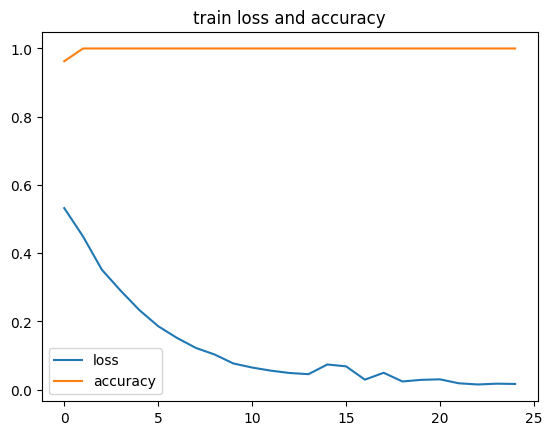

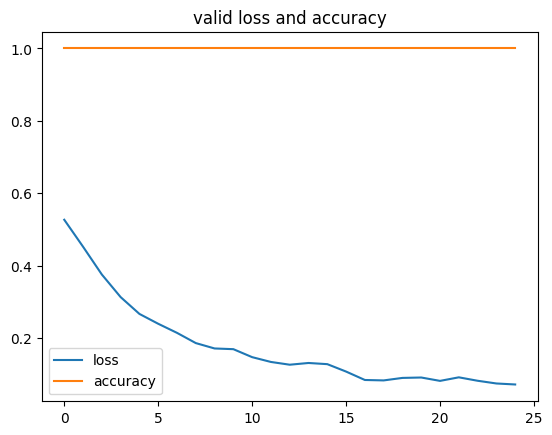

In [93]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

LR = 0.00001
EPOCHS = 25
# 손실함수
# 신경망에 sigmoid를 썼으므로 BCELoss()사용
# 만약 신경망에 softmax를 썼다면 CrossEntropyLoss()사용
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer정의
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# scheduler 추가
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 학습
fit(model, criterion, optimizer, EPOCHS, train_loader, valid_loader, resume=False)

In [94]:
import matplotlib.pyplot as plt
from PIL import Image

# 테스트 데이터에서 성능을 평가하고, 예측이 잘못된 이미지를 시각화하는 함수
def evaluate_and_visualize(model, test_loader, criterion):
    test_loss = 0
    test_correct = 0
    test_total = 0
    #incorrect_images = []
    incorrect_labels = []
    incorrect_preds = []
    incorrect_filenames = []

    model.eval()
    with torch.no_grad():
        for test_x, test_y, filenames in tqdm(test_loader):
            test_x, test_y = test_x.to(device), test_y.to(device)
            outputs = model(test_x)
            loss = criterion(outputs, test_y)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            # 정확도 계산
            test_correct += (predicted == test_y).sum().item()
            test_total += test_y.size(0)

            if predicted != test_y:
                incorrect_labels.append(test_y.cpu().numpy())
                incorrect_preds.append(predicted.cpu().numpy())
                incorrect_filenames.append(filenames[0])

    test_accuracy = test_correct / test_total
    print("test_correct:{}, test_total:{}".format(test_correct, test_total))
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    print(len(incorrect_filenames))

    # 예측이 잘못된 이미지 시각화
    fig = plt.figure(figsize=(12, 12))
    for i in range(min(16, len(incorrect_filenames))):
        ax = fig.add_subplot(4, 4, i + 1)
        image = Image.open(incorrect_filenames[i])
        ax.imshow(image)
        true_label = 'banana' if incorrect_labels[i] == 1 else 'blueberry'
        pred_label = 'banana' if incorrect_preds[i] == 1 else 'blueberry'
        filename = os.path.basename(incorrect_filenames[i])
        ax.set_title(f'Pred: {pred_label}, Label: {true_label}, {filename}', fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [95]:
# 테스트 데이터를 통해 성능 평가 및 잘못된 예측 시각화
evaluate_and_visualize(model, test_loader, criterion)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:05<00:00,  9.44it/s]

test_correct:48, test_total:48
Test Loss: 0.1173, Test Accuracy: 100.00%
0


<Figure size 1200x1200 with 0 Axes>